# DS-GA-3001 Advanced Python for Data Science

Before you turn this problem in, make sure you **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart). You can then run the cells **in order**, during the class.

Any textual answers that need to be provided will be marked with "YOUR ANSWER HERE". Replace this text with your answer to the question.

Any code answers that need to be provided will be marked with:

```
# YOUR CODE HERE
raise NotImplementedError()
```

Replace all this code with your answer to the question. If you do not answer the question, the `NotImplementedError` exception will be raised, which will indicate to the grader that no answer has been supplied.

In many cases, code answers will also have some associated test code. You should execute the tests after you have entered your code in order to ensure that your answer is correct. You should not proceed to the next question until your answer is correct.

Finally, insert your Net ID and the Net ID's of any collaborators in the cell below.

In [1]:
NET_ID = "hz990"
COLLABORATORS = ""

# GPU Programming With Numba

Numba supports CUDA GPU programming by directly compiling a restricted subset of Python code into CUDA kernels and device functions following the CUDA execution model. 

One feature that significantly simplifies writing GPU kernels is that Numba makes it appear that the kernel has direct access to NumPy arrays. NumPy arrays that are supplied as arguments to the kernel are transferred between the CPU and the GPU automatically (although this can also be an issue).

Numba does not yet implement the full CUDA API, so some features are not available. However the features that are provided are enough to begin experimenting with writing GPU enable kernels. CUDA support in Numba is being actively developed, so eventually most of the features should be available.

## Installation

Numba supports CUDA-enabled GPUs with [compute capability 2.0](http://docs.nvidia.com/cuda/cuda-c-programming-guide/#compute-capability-2-x) or above with an up-to-data Nvidia driver. You can still use Numba without a CUDA-enabled GPU using the CUDA simulator, however you will not get the performance benefits of running on a GPU.

You will need the CUDA toolkit installed. If you are using Conda, just type:

It is also possible to install the CUDA Toolkit directly from NVIDIA, however this may require additional configuration to enable it to work with Numba.

## Terminology

Several important terms in the topic of CUDA programming are listed here:

- *host*: the CPU
- *device*: the GPU
- *host memory*: the system main memory
- *device memory*: onboard memory on a GPU card
- *kernel*: a GPU function launched by the host and executed on the device
- *device function*: a GPU function executed on the device which can only be called from the  device (i.e. from a kernel or another device function)

## Device Management

It is possible to obtain a list of all the GPUs in the system using the following commands:

In [1]:
from numba import cuda
print cuda.gpus

<Managed Device 0>


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


If you do not have a CUDA-enabled GPU on your system, you will receive the following error:

If you do have a CUDA-enabled GPU on your system, you should see a message like:

If your machine has multiple GPUs, you might want to select which one to use. By default the CUDA driver selects the fastest GPU as the device 0, which is the default device used by Numba.

**`numba.cuda.select_device(`** ***`device_id`*** **`)`**

Create a new CUDA context for the selected `device_id`. `device_id` should be the number of the device (starting from 0; the device order is determined by the CUDA libraries). The context is associated with the current thread. Numba currently allows only one context per thread.

## Using the CUDA simulator

If you don't have a CUDA-enabled GPU, then you will need to use the CUDA simulator. The simulator is enabled by setting the environment variable `NUMBA_ENABLE_CUDASIM` to `1`.

### Mac/Linux

Launch a terminal shell and type the commands:

### Windows

Launch a `CMD` shell and type the commands:

<div class="alert alert-success">
Now rerun the Device List command and check that you get the correct output.
</div>

## Writing CUDA kernels

CUDA has an execution model unlike the traditional sequential model used for programming CPUs. In CUDA, the code you write will be executed by multiple threads at once (often hundreds or thousands). Your solution will be modeled by defining a thread hierarchy of ***grid***, ***blocks***, and ***threads***.

Numba also exposes three kinds of GPU memory: 
- ***global device memory***
- ***shared memory***
- ***local memory***

For all but the simplest algorithms, it is important that you carefully consider how to use and access memory in order to minimize bandwidth requirements and contention.

NVIDIA recommends that programmers focus on following those recommendations to achieve the best performance:
 
- Find ways to parallelize sequential code,
- Minimize data transfers between the host and the device,
- Adjust kernel launch configuration to maximize device utilization,
- Ensure global memory accesses are coalesced,
- Minimize redundant accesses to global memory whenever possible,
- Avoid different execution paths within the same warp.

## Kernel declaration

A kernel function is a GPU function that is meant to be called from CPU code. It has two fundamental characteristics:

- kernels cannot explicitly return a value; all result data must be written to an array passed to the function (if computing a scalar, you will probably pass a one-element array);
- kernels explicitly declare their thread hierarchy when called: i.e. the number of thread blocks and the number of threads per block (note that while a kernel is compiled once, it can be called multiple times with different block sizes or grid sizes).

In [2]:
from numba import cuda
@cuda.jit
def my_kernel(io_array):
    """
    Code for kernel.
    """
    # code here

## Kernel invocation

A kernel is typically launched in the following way:

In [3]:
import numpy

# Create the data array - usually initialized some other way
data = numpy.ones(256)

# Set the number of threads in a block
threadsperblock = 32 

# Calculate the number of thread blocks in the grid
blockspergrid = (data.size + (threadsperblock - 1)) // threadsperblock

# Now start the kernel
my_kernel[blockspergrid, threadsperblock](data)

# Print the result
print data

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

There are two main steps:

1. Instantiate the kernel proper, by specifying a number of **blocks per grid** and a number of **threads per block**. The product of the two will give the total number of threads launched. Kernel instantiation is done by taking the compiled kernel function and indexing it with a tuple of integers.
2. Running the kernel, by passing it the input array (and any separate output arrays if necessary). By default, running a kernel is synchronous: the function returns when the kernel has finished executing and the data is synchronized back.

### Choosing the block size

The two-level thread hierarchy is important for the following reasons:

- On the software side, the block size determines how many threads share a given area of shared memory.
- On the hardware side, the block size must be large enough for full occupation of execution units; recommendations can be found in the CUDA C Programming Guide.

The block size you choose depends on a range of factors, including:
- The size of the data array
- The size of the shared mempory per block (e.g. 64KB)
- The maximum number of threads per block supported by the hardware (e.g. 512 or 1024)
- The maximum number of threads per multiprocessor (MP) (e.g. 2048)
- The maximum number of blocks per MP (e.g. 32)
- The number of threads that can be executed concurrently (a "warp" i.e. 32)

The execution of threads in a warp has a big effect on the computational throughput. If all threads in a warp are executing the same instruction then they can all be executed in parallel. But if one or more threads is executing a different instruction, the warp has to be split into groups of threads, and these groups execute serially.

Rules of thumb for threads per block:
- Should be a round multiple of the warp size (32)
- A good place to start is 128-512 but benchmarking is required to determine the optimal value.

Each streaming multiprocessor (SP) on the GPU must have enough active warps to achieve maximum throughput. In other words, the blocksize is usually selected to maximize the "occupancy". See the [CUDA Occupancy Calculator spreadsheet](http://developer.download.nvidia.com/compute/cuda/CUDA_Occupancy_calculator.xls) for more details.

## Thread positioning

When running a kernel, the kernel function’s code is executed by every thread once. It therefore has to know which thread it is in, in order to know which array element(s) it is responsible for (complex algorithms may define more complex responsibilities, but the underlying principle is the same).

To help deal with multi-dimensional arrays, CUDA allows you to specify multi-dimensional blocks and grids. In the example above, you could make `blockspergrid` and `threadsperblock` tuples of one, two or three integers. Compared to 1-dimensional declarations of equivalent sizes, this doesn’t change anything to the efficiency or behaviour of generated code, but can help you write your algorithms in a more natural way.

One way is for the thread to determines its position in the grid and block and manually compute the corresponding array position:

In [4]:
from numba import cuda
@cuda.jit
def my_kernel(io_array):
    # Thread id in a 1D block
    tx = cuda.threadIdx.x
    # Block id in a 1D grid
    ty = cuda.blockIdx.x
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x
    # Compute flattened index inside the array
    pos = tx + ty * bw
    if pos < io_array.size:  # Check array boundaries
        io_array[pos] *= 2 # do the computation

<div class="alert alert-warning">
Note: Unless you are sure the block size and grid size is a divisor of your array size, you must check boundaries as shown above.
</div>

The following special objects are provided by the CUDA backend for the sole purpose of knowing the geometry of the thread hierarchy and the position of the current thread within that geometry:

- **`numba.cuda.threadIdx`** - The thread indices in the current thread block. For 1-dimensional blocks, the index (given by the x attribute) is an integer spanning the range from 0 to `numba.cuda.blockDim - 1`. A similar rule exists for each dimension when more than one dimension is used.
- **`numba.cuda.blockDim`** - The shape of the block of threads, as declared when instantiating the kernel. This value is the same for all threads in a given kernel, even if they belong to different blocks (i.e. each block is “full”).
- **`numba.cuda.blockIdx`** - The block indices in the grid of threads launched a kernel. For a 1-dimensional grid, the index (given by the x attribute) is an integer spanning the range from 0 to `numba.cuda.gridDim - 1`. A similar rule exists for each dimension when more than one dimension is used.
- **`numba.cuda.gridDim`** - The shape of the grid of blocks, i.e. the total number of blocks launched by this kernel invocation, as declared when instantiating the kernel.

These objects can be 1-, 2- or 3-dimensional, depending on how the kernel was invoked. To access the value at each dimension, use the x, y and z attributes of these objects, respectively.

### Absolute positions

Simple algorithms will tend to always use thread indices in the same way as shown in the example above. Numba provides additional facilities to automate such calculations:

- **`numba.cuda.grid(ndim)`** - Return the absolute position of the current thread in the entire grid of blocks. `ndim` should correspond to the number of dimensions declared when instantiating the kernel. If `ndim` is 1, a single integer is returned. If `ndim` is 2 or 3, a tuple of the given number of integers is returned.

- **`numba.cuda.gridsize(ndim)`** - Return the absolute size (or shape) in threads of the entire grid of blocks. `ndim` has the same meaning as in `grid()` above.

Using these functions, the our example can become:

In [5]:
from numba import cuda
@cuda.jit
def my_kernel2(io_array):
    pos = cuda.grid(1)
    if pos < io_array.size:
        io_array[pos] *= 2 # do the computation

<div class="alert alert-success">
Now we can run the host code that calls the kernel. Notice that the grid computation when instantiating the kernel must still be done manually.
</div>

In [9]:
from __future__ import division
import numpy
import math

data = numpy.ones(256)
threadsperblock = 256
blockspergrid = math.ceil(data.shape[0] / threadsperblock)
my_kernel2[blockspergrid, threadsperblock](data)
print data

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2

<div class="alert alert-success">
Assuming that `x, y = cuda.grid(2)` returns the thread indices, rewrite the kernel to work if `io_array` is a 2-dimensional array. Make sure that you verify that `x` and `y` are within the bounds of the array.
</div>

In [34]:
from numba import cuda
@cuda.jit
def my_kernel_2D(io_array):
    s0 = numpy.shape(data)[0]
    s1 = numpy.shape(data)[1]
    x, y = cuda.grid(2)
    if x < s0 and y < s1:
        io_array[x, y] *= 2

<div class="alert alert-success">
Now run the kernel using the following host program.
</div>

In [35]:
from __future__ import division

import numpy
import math

data = numpy.ones((16, 16))
threadsperblock = (16, 16)
blockspergrid_x = math.ceil(data.shape[0] / threadsperblock[0])
blockspergrid_y = math.ceil(data.shape[1] / threadsperblock[1])
blockspergrid = (blockspergrid_x, blockspergrid_y)
my_kernel_2D[blockspergrid, threadsperblock](data)
print data

[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 

## Memory management

Numba has been automatically transferring the NumPy arrays to the device when you invoke the kernel. However, it can only do so conservatively by always transferring the device memory back to the host when a kernel finishes. To avoid the unnecessary transfer for read-only arrays, it is possible to manually control the transfer.

**`device_array = cuda.device_array(`** ***`shape`*** **`)`**

Allocate an empty device ndarray. Similar to `numpy.empty()`.

**`device_array = cuda.to_device(`** ***`array`*** **`)`**

Allocate and transfer a NumPy ndarray to the device.

### A more complex example: matrix multiplication

The following code sample is a straightforward implementation of matrix multiplication for matrices where each thread reads one row of `A` and one column of `B` and computes the corresponding element of `C`.

![](http://drive.google.com/uc?export=view&id=0B_3lImS7uRMgbmMxMTVaN0pDWGc)

In [36]:
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

<div class="alert alert-success">
Run the host code to see how the kernel works for the input arrays. Notice that the number of threads per block and blocks per grid is not really important, other than to ensure that there are enough threads to complete the calcualtion.
</div>

In [41]:
from __future__ import division

import numpy
import math

# The data array
mat1 = numpy.full((24, 12), 3, numpy.float) # matrix containing all 3's
mat2 = numpy.full((12, 22), 4, numpy.float) # matrix containing all 4's

d_mat1 = cuda.to_device(mat1)
d_mat2 = cuda.to_device(mat2)
d_mat3 = cuda.device_array((24, 22))

# Configure the blocks

##### Extra Credit#####
threadsperblock = (16, 16)
blockspergrid_x = int(math.ceil(mat1.shape[0] / threadsperblock[1]))
blockspergrid_y = int(math.ceil(mat2.shape[1] / threadsperblock[0]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

# Start the kernel 
matmul[blockspergrid, threadsperblock](d_mat1, d_mat2, d_mat3)
res = d_mat3.copy_to_host()

print res

[[ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.  144.
   144.  144.  144.  144.  144.  144.  144.  144.  144.  144.]
 [ 144.  144.  144.  144.  144.  144.  14

<div class="alert alert-warning">
A problem with this code is that each thread is reading from the global memory containing `A` and `B`. In fact, `A` is read `B.shape[1]` times and `B` in read `A.shape[0]` times. Since global memory is fairly slow, this results in an inefficient use of the GPU.
</div>

### Shared memory and thread synchronization

A limited amount of shared memory can be allocated on the device to speed up access to data, when necessary. That memory will be shared (i.e. both readable and writable) amongst all threads belonging to a given block and has faster access times than regular device memory. It also allows threads to cooperate on a given solution. You can think of it as a manually-managed data cache.

The function to create a shared memory array is:

**`shared_array = cuda.shared.array(`*`shape`*`, `*`type`*`)`**

- `shape` is either an integer or a tuple of integers representing the array’s dimensions.
- `type` is a [Numba type](http://numba.pydata.org/numba-doc/dev/reference/types.html#numba-types) of the elements needing to be stored in the array

The memory is allocated once for the duration of the kernel, unlike traditional dynamic memory management.

Because the shared memory is a limited resource, it is often necessary to preload a small block at a time from the input arrays. The threads then need to to wait until all threads have finished preloading before doing the computation on the shared memory. Synchronization is then required again after the computation to ensure all threads have finished with the data in shared memory before overwriting it in the next loop iteration.

The function to synchronized threads is:

**`cuda.syncthreads()`**

This function will synchronize all threads in the same thread block. This function implements the same pattern as ***barriers*** in traditional multi-threaded programming. The program will wait until all threads in the block call the function, at which point it returns control to all its callers.

### Improved matrix multiplication

The following example shows how shared memory can be used when performing matrix multiplication. For input arrays of shape `[m x n]` and `[n x p]` the result will be `[m x p]`.

In this example, each thread block is responsible for computing a square sub-matrix of `C` and each thread for computing an element of the sub-matrix. The sub-matrix is equal to the product of a square sub-matrix of `A` (`sA`) and a square sub-matrix of `B` (`sB`). In order to fit into the device resources, the two input matrices are divided into as many square sub-matrices of dimension TPB as necessary, and the result computed as the sum of the products of these square sub-matrices. 

Each product is performed by first loading sA and sB from global memory to shared memory, with one thread loading each element of each sub-matrix. Once sA and sB have been loaded, each thread accumulates the result into a register (`tmp`). Once all the products have been calculated, the results are written to the matrix `C` in global memory.

By blocking the computation this way, we can reduce the number of global memory accesses since `A` is now only read `B.shape[1] / TPB` times and `B` is read `A.shape[0] / TPB` times.

![](http://drive.google.com/uc?export=view&id=0B_3lImS7uRMgSXdLR05XdHUyUnc)

In [45]:
from numba import cuda, float32

# Controls threads per block and shared memory usage.
# The computation will be done on blocks of TPBxTPB elements.
TPB = 16

@cuda.jit
def fast_matmul(A, B, C):
    """
    Perform matrix multiplication of C = A * B
    Each thread computes one element of the result matrix C
    """

    # Define an array in the shared memory
    # The size and type of the arrays must be known at compile time
    sA = cuda.shared.array(shape=(TPB, TPB), dtype=float32)
    sB = cuda.shared.array(shape=(TPB, TPB), dtype=float32)

    x, y = cuda.grid(2)
 
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y

    if x >= C.shape[0] and y >= C.shape[1]:
        # Quit if (x, y) is outside of valid C boundary
        return

    # Each thread computes one element in the result matrix.
    # The dot product is chunked into dot products of TPB-long vectors.
    tmp = 0.
    for i in range(int(A.shape[1] / TPB)):
        # Preload data into shared memory
        sA[tx, ty] = A[x, ty + i * TPB]
        sB[tx, ty] = B[tx + i * TPB, y]

        # Wait until all threads finish preloading
        cuda.syncthreads()

        # Computes partial product on the shared memory
        for j in range(TPB):
            tmp += sA[tx, j] * sB[j, ty]

        # Wait until all threads finish computing
        cuda.syncthreads()

    C[x, y] = tmp

<div class="alert alert-success">
Run your new kernel using the host program below to verify that it works correctly.
</div>

In [47]:
from __future__ import division

import numpy
import math

# The data array
mat1 = numpy.full((TPB*2, TPB*3), 3, numpy.float) # [32 x 48] matrix containing all 3's
mat2 = numpy.full((TPB*3, TPB*1), 4, numpy.float) # [48 x 16] matrix containing all 4's

d_mat1 = cuda.to_device(mat1)
d_mat2 = cuda.to_device(mat2)
d_mat3 = cuda.device_array((TPB*2, TPB*1)) # [32 x 16] matrix result

# Configure the blocks
threadsperblock = (TPB, TPB)
blockspergrid_x = int(math.ceil(mat1.shape[0] / threadsperblock[1]))
blockspergrid_y = int(math.ceil(mat2.shape[1] / threadsperblock[0]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

# Start the kernel 
fast_matmul[blockspergrid, threadsperblock](d_mat1, d_mat2, d_mat3)
res = d_mat3.copy_to_host()

print res

[[ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  576.  576.]
 [ 576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.  576.
   576.  576.  57

## Exercise

The following program is the familar computation of the Mandelbrot fractal.

In [49]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


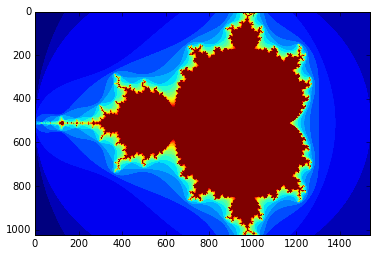

In [50]:
import numpy as np
from pylab import imshow, show

def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return max_iters

def compute_mandel(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            image[y, x] = mandel(real, imag, iters)
            
image = np.zeros((1024, 1536), dtype = np.uint8)
compute_mandel(-2.0, 1.0, -1.0, 1.0, image, 20) 
imshow(image)
show()

<div class="alert alert-success">
First, modify the above code to implement the `mandel_kernel` function below. Hint: every thread should compute one value of the `image` array.
</div>

In [70]:
from numba import cuda
import numpy as np

@cuda.jit
def mandel_gpu(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return max_iters

@cuda.jit
def mandel_kernel(min_x, max_x, min_y, max_y, image, iters):

    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height

    blockDimx = cuda.blockDim.x * cuda.blockIdx.x + cuda.threadIdx.x
    blockDimy = cuda.blockDim.y * cuda.blockIdx.y + cuda.threadIdx.y
    gridDimx = cuda.gridDim.x * cuda.blockDim.x;
    gridDimy = cuda.gridDim.y * cuda.blockDim.y;

    for x in xrange(blockDimx, width, gridDimx):
        real = min_x + x * pixel_size_x
        for y in xrange(blockDimy, height, gridDimy):
            imag = min_y + y * pixel_size_y
            image[y, x] = mandel(real, imag, iters)


<div class="alert alert-success">
Verify your code works as expected using the host program below.
</div>

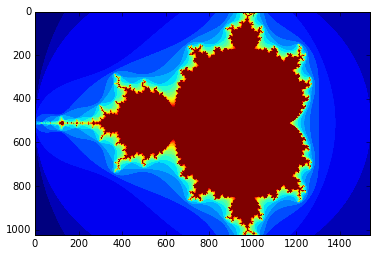

In [71]:
from pylab import imshow, show

gimage = np.zeros((1024, 1536), dtype = np.uint8)
blockdim = (32, 8)
griddim = (32,16)

d_image = cuda.to_device(gimage)
mandel_kernel[griddim, blockdim](-2.0, 1.0, -1.0, 1.0, d_image, 20) 
d_image.to_host()
imshow(gimage)
show()

### Bonus marks

<div class="alert alert-success">
Modify your answer above to use shared memory when computing the image array.
</div>

In [ ]:
from numba import cuda
import numpy as np

@cuda.jit
def mandel_gpu(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return max_iters

@cuda.jit
def mandel_kernel_shared(min_x, max_x, min_y, max_y, image, iters):
    # YOUR CODE HERE
    raise NotImplementedError()

<div class="alert alert-success">
Verify your code works as expected using the host program below.
</div>

In [ ]:
from pylab import imshow, show

gimage = np.zeros((1024, 1536), dtype = np.uint8)
blockdim = (32, 8)
griddim = (32,16)

d_image = cuda.to_device(gimage)
mandel_kernel_shared[griddim, blockdim](-2.0, 1.0, -1.0, 1.0, d_image, 20) 
d_image.to_host()
imshow(gimage)
show()